In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
df=pd.read_csv('sales_data_with_discounts.csv')

In [28]:
df.head()

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770


In [29]:
# Identify numerical & categorical columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               450 non-null    object 
 1   Day                450 non-null    object 
 2   SKU                450 non-null    object 
 3   City               450 non-null    object 
 4   Volume             450 non-null    int64  
 5   BU                 450 non-null    object 
 6   Brand              450 non-null    object 
 7   Model              450 non-null    object 
 8   Avg Price          450 non-null    int64  
 9   Total Sales Value  450 non-null    int64  
 10  Discount Rate (%)  450 non-null    float64
 11  Discount Amount    450 non-null    float64
 12  Net Sales Value    450 non-null    float64
dtypes: float64(3), int64(3), object(7)
memory usage: 45.8+ KB


In [30]:
### Identify numerical columns
num_cols = df.select_dtypes(include=['int64','float64']).columns
num_cols

Index(['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)',
       'Discount Amount', 'Net Sales Value'],
      dtype='object')

In [56]:
### identify categorical columns
cat_cols=df.select_dtypes(include=['object']).columns
cat_cols

Index(['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model'], dtype='object')

In [57]:
### Calculate mean, median, mode, and standard deviation
stats = pd.DataFrame({
    'Mean':df[num_cols].mean(),
    'Median':df[num_cols].median(),
    'Mode':df[num_cols].mode().iloc[0],
    'Standard_Deviation':df[num_cols].std()
})
stats

,Mean,Median,Mode,Standard_Deviation
Volume,5.066667,4.000000,3.000000,4.231602
Avg Price,10453.433333,1450.000000,400.000000,18079.904840
Total Sales Value,33812.835556,5700.000000,24300.000000,50535.074173
Discount Rate (%),15.155242,16.577766,5.007822,4.220602
Discount Amount,3346.499424,988.933733,69.177942,4509.902963
Net Sales Value,30466.336131,4677.788059,326.974801,46358.656624


In [75]:
### Mean → average value.
### Median → middle value.
### Mode → most common value.
### Standard Deviation → how spread out the numbers are,Big number = values vary a lot,Small number = values are close to each other

### Data Visualization

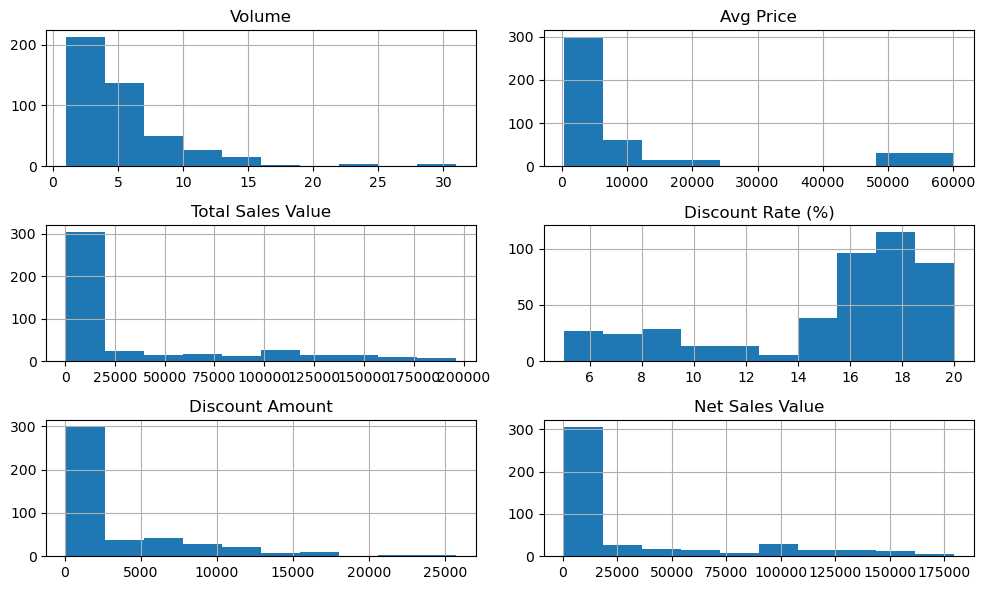

In [58]:
###	Histograms
df[num_cols].hist(figsize=(10,6))
plt.tight_layout()
plt.show()

In [59]:
### Simple analysis Histograms show how the values are spread,If the bars lean to one side data is skewed.
### Long tails or scattered bars → possible outliers,all bars in one place → many values are concentrated there.

In [60]:
### BOX PLOTS

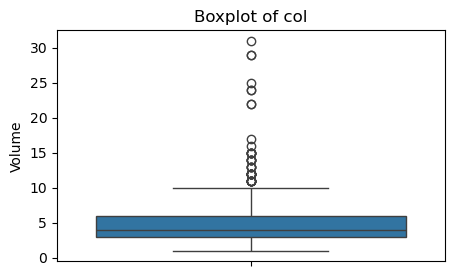

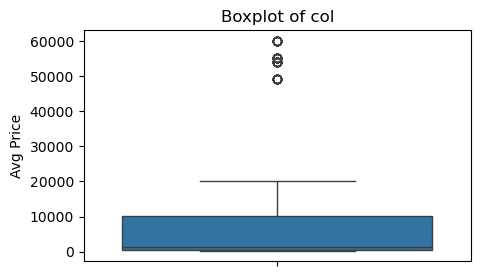

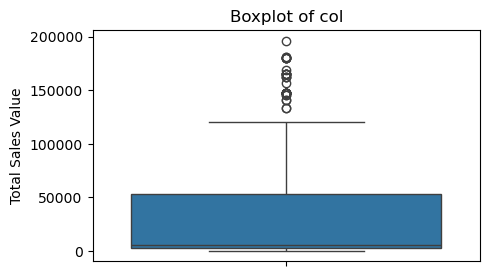

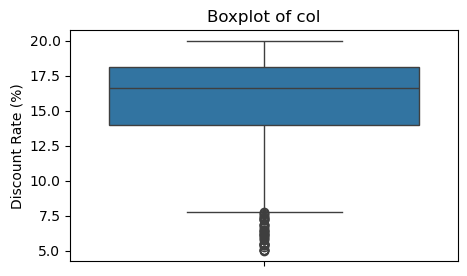

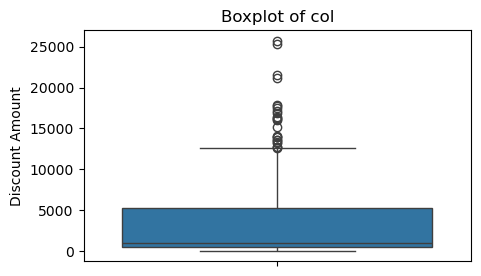

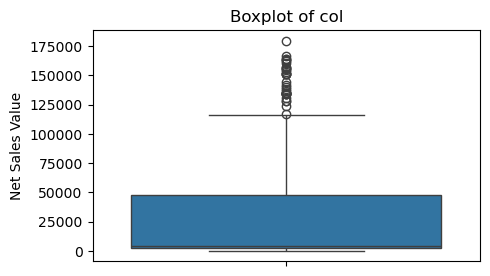

In [61]:
for col in num_cols:
    plt.figure(figsize=(5, 3))
    sns.boxplot(y=df[col])
    plt.title('Boxplot of col')
    plt.show()

In [62]:
### analysis . Boxplots highlight outliers,The box shows the Interquartile Range (IQR) — the middle 50% of values.
###Outliers indicate unusual or extreme values,A long upper whisker  high spread on the upper side.

In [50]:
### bar charts

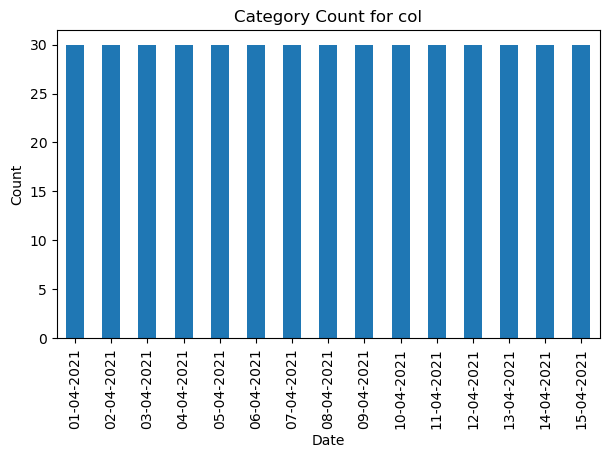

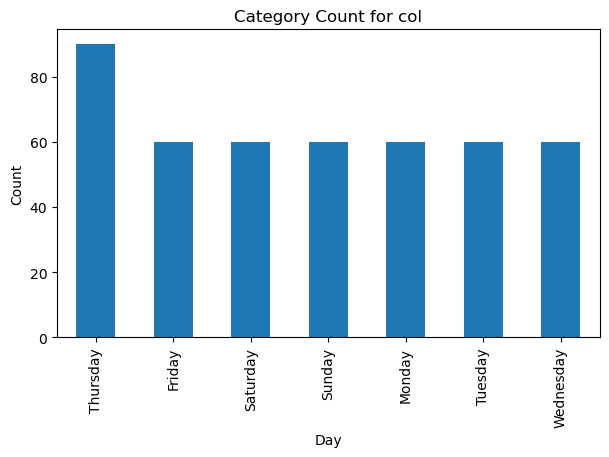

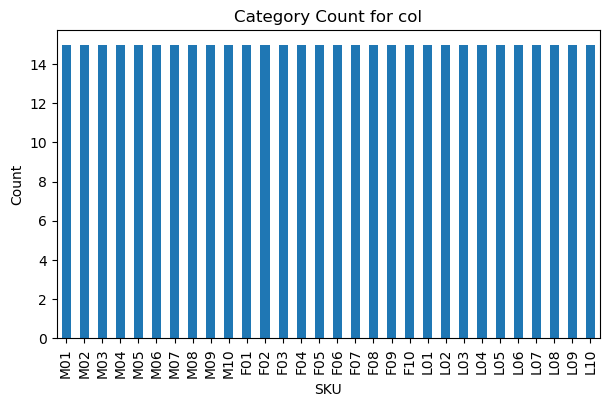

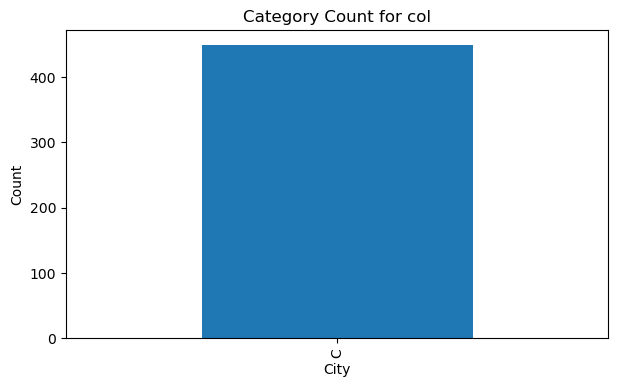

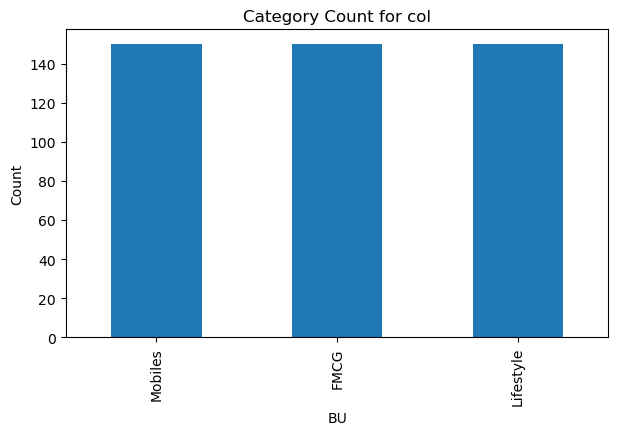

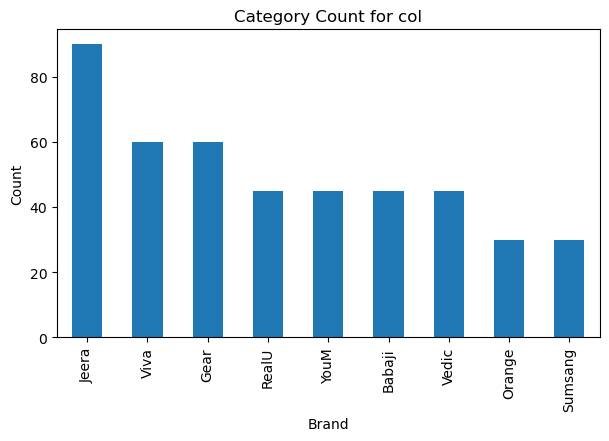

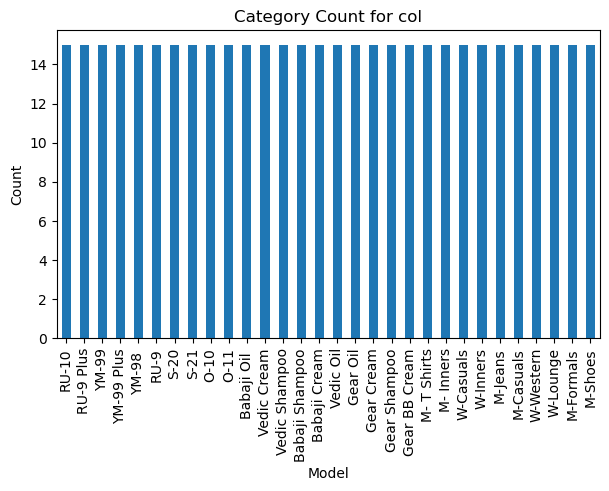

In [74]:
for col in cat_cols:
    plt.figure(figsize=(7, 4))
    df[col].value_counts().plot(kind='bar')
    plt.title('Category Count for col')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

In [76]:
### Shows how many times each category appears,If one bar is much taller → that category is dominant.
### If bars are similar  categories are evenly spread,Helps understand patterns like most common product type, region, etc.